In [1]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
data=load_breast_cancer()

In [3]:
x,y=data['data'],data['target']

In [4]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
clf=LinearSVC()
clf.fit(x_train,y_train)

c:\Users\jbsan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\jbsan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [7]:
clf.score(x_test,y_test)

0.9385964912280702

In [8]:
clf.predict([x_test[0]])

array([1])

In [9]:
explainer=shap.KernelExplainer(clf.predict,shap.kmeans(x_train,10))

In [10]:
shap_values=explainer.shap_values(x_test)

  0%|          | 0/114 [00:00<?, ?it/s]

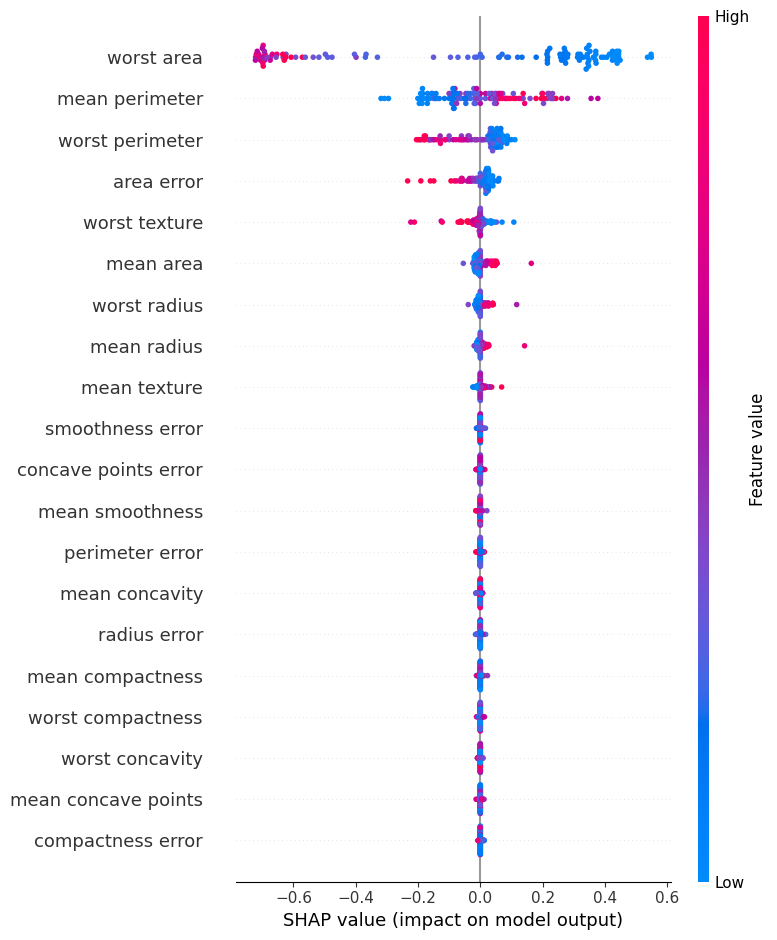

In [11]:
shap.summary_plot(shap_values,x_test,feature_names=data['feature_names'])

In [12]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[5],x_test[5],feature_names=data['feature_names'])

In [13]:
mean_absolute_shap_values=np.abs(shap_values).mean(axis=0)

In [14]:
feature_names=data['feature_names']
feature_importance=zip(feature_names,mean_absolute_shap_values)

In [15]:
sorted_feature_importances=sorted(feature_importance,key=lambda x:x[1],reverse=True)

In [16]:
sorted_feature_importances

[('worst area', 0.4038415857824359),
 ('mean perimeter', 0.1173186442992348),
 ('worst perimeter', 0.07006387417744477),
 ('area error', 0.031233173486617846),
 ('worst texture', 0.02112258839641792),
 ('mean area', 0.01639770238545115),
 ('worst radius', 0.012028265621018684),
 ('mean radius', 0.008782383110415735),
 ('mean texture', 0.006924439847756416),
 ('smoothness error', 0.0019093159861628807),
 ('concave points error', 0.0018767243225345546),
 ('mean smoothness', 0.0018189132180985192),
 ('perimeter error', 0.0017848261608496643),
 ('mean concavity', 0.001770662176582906),
 ('radius error', 0.0017145771706372015),
 ('mean compactness', 0.0016790992793927354),
 ('worst compactness', 0.0015932413117419185),
 ('worst concavity', 0.0015866821076311857),
 ('mean concave points', 0.001527499581720206),
 ('compactness error', 0.0015137438728573226),
 ('mean fractal dimension', 0.0014927069927856184),
 ('texture error', 0.0014864349248731434),
 ('worst concave points', 0.0014844115255

In [17]:
for feature, importance in sorted_feature_importances:
    print(feature,':',importance)

worst area : 0.4038415857824359
mean perimeter : 0.1173186442992348
worst perimeter : 0.07006387417744477
area error : 0.031233173486617846
worst texture : 0.02112258839641792
mean area : 0.01639770238545115
worst radius : 0.012028265621018684
mean radius : 0.008782383110415735
mean texture : 0.006924439847756416
smoothness error : 0.0019093159861628807
concave points error : 0.0018767243225345546
mean smoothness : 0.0018189132180985192
perimeter error : 0.0017848261608496643
mean concavity : 0.001770662176582906
radius error : 0.0017145771706372015
mean compactness : 0.0016790992793927354
worst compactness : 0.0015932413117419185
worst concavity : 0.0015866821076311857
mean concave points : 0.001527499581720206
compactness error : 0.0015137438728573226
mean fractal dimension : 0.0014927069927856184
texture error : 0.0014864349248731434
worst concave points : 0.0014844115255938934
mean symmetry : 0.0013994063201175095
worst fractal dimension : 0.0013399822526269636
symmetry error : 0.0